# Old vs. New (BASE vs. KOLA)

In [19]:
# IMPORT NECESSARY PACKAGES
import sys
import numpy as np
import matplotlib.pyplot as plt

# PAARTI
from paarti.utils import maos_utils

# VISMCAO
sys.path.append("../scripts/plotting")
import utils

# Parameters

In [52]:
base_file_path = "../../../scao/base_with_new_maos/base/psf_512_line/"
kola_file_path = "../studies/act_study/4000actuators/"

In [75]:
psf_x = [0, 5, 10, 15, 20, 25, 30, 35, 45, 60]  # arcsec
psf_y = [0, 0,  0,  0,  0,  0,  0,  0,  0,  0]  # arcsec
psf_wvl = [432, 544, 652, 810, 877, 1020, 1248, 1673, 2200] # nanometer

actuators = [2000, 3000, 4000, 5000]

bandpass = 3 # 1000 nanometers
seed = 1

%matplotlib inline

In [61]:
def rearrange_array(array):
    return np.concatenate((array[:1], array[8:9], array[1:8], array[9:]), axis=0)

# Get PSF metrics and wavefront error

In [102]:
importlib.reload(utils)

<module 'utils' from '/System/Volumes/Data/mnt/g2/scratch/bpeck/ao/mcao/vismcao/notebooks/../scripts/plotting/utils.py'>

## BASE

In [103]:
# Load BASE wavefront error
wfe_base = utils.get_wfe_metrics_over_field(directory=base_file_path, seed=seed) 

Looking in directory: ../../../scao/base_with_new_maos/base/psf_512_line/


In [104]:
# LOAD PSF metrics
metrics_base = maos_utils.get_psf_metrics_over_field(directory=base_file_path, seed=seed)

In [105]:
# Get BASE wavefront error and PSF metrics
open_mean_nm_base, clos_mean_nm_base, open_xx_mean_nm_base, clos_xx_mean_nm_base = wfe_base

x_base, y_base, wvl_base, strehl_base, fwhm_g_base, fwhm_e_base, r_ee50_base, r_ee80_base = metrics_base

## KOLA

In [107]:
# Load KOLA Wavefront error
wfe_kola = utils.get_wfe_metrics_over_field(directory=kola_file_path, seed=seed) 

Looking in directory: ../studies/act_study/4000actuators/


In [117]:
# Load KOLA PSF metrics
metrics_kola = maos_utils.get_psf_metrics_over_field(directory=kola_file_path, seed=seed)

In [124]:
# Get KOLA wavefront error and PSF metrics
open_mean_nm_kola, clos_mean_nm_kola, open_xx_mean_nm_kola, clos_xx_mean_nm_kola = wfe_kola

tmp_x_kola, tmp_y_kola, tmp_wvl_kola, tmp_strehl_kola, tmp_fwhm_g_kola, tmp_fwhm_e_kola, tmp_r_ee50_kola, tmp_r_ee80_kola = metrics_kola

x_kola = rearrange_array(tmp_x_kola)
y_kola = rearrange_array(tmp_y_kola)
wvl_kola = rearrange_array(tmp_wvl_kola)
strehl_kola = rearrange_array(tmp_strehl_kola)
fwhm_g_kola = rearrange_array(tmp_fwhm_g_kola)
fwhm_e_kola = rearrange_array(tmp_fwhm_e_kola)
r_ee50_kola = rearrange_array(tmp_r_ee50_kola)
r_ee80_kola = rearrange_array(tmp_r_ee80_kola)

# Plot old vs. new

## Strehl

In [137]:
n_wvl_base = x_base.shape[1]
colors_base = plt.cm.jet(np.linspace(0, 1, n_wvl_base)) 

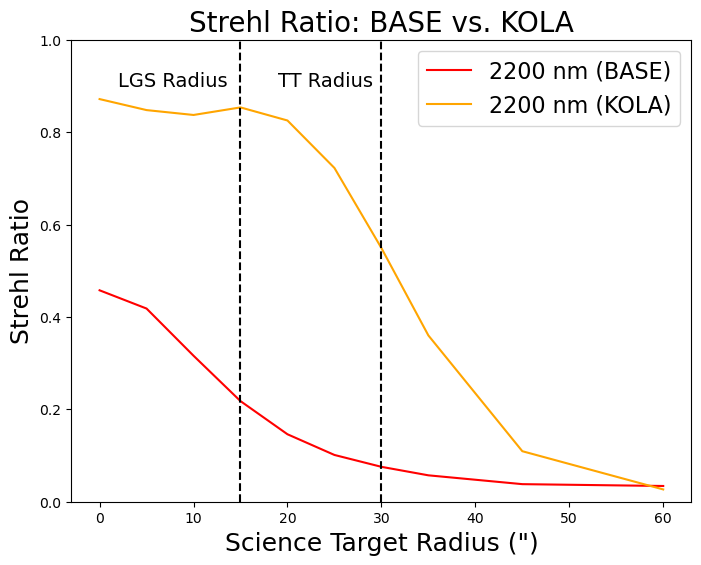

In [194]:
plt.figure(figsize=(8, 6))
plt.plot(x_base[:, 8], strehl_base[:, 8], color="red", label="2200 nm (BASE)")
plt.plot(x_kola[:, 8], strehl_kola[:, 8], color="orange", label="2200 nm (KOLA)")

plt.axvline(x = 15, color="black", linestyle = "--")
plt.text(x=2, y=.9, s="LGS Radius", fontsize=14)

plt.axvline(x = 30, color="black", linestyle = "--")
plt.text(x=19, y=.9, s="TT Radius", fontsize=14)

plt.ylim(0, 1)

plt.title("Strehl Ratio: BASE vs. KOLA", fontsize=20)
plt.xlabel('Science Target Radius (")', fontsize=18)
plt.ylabel("Strehl Ratio", fontsize=18)
plt.legend(fontsize=16)
plt.show()

## WFE

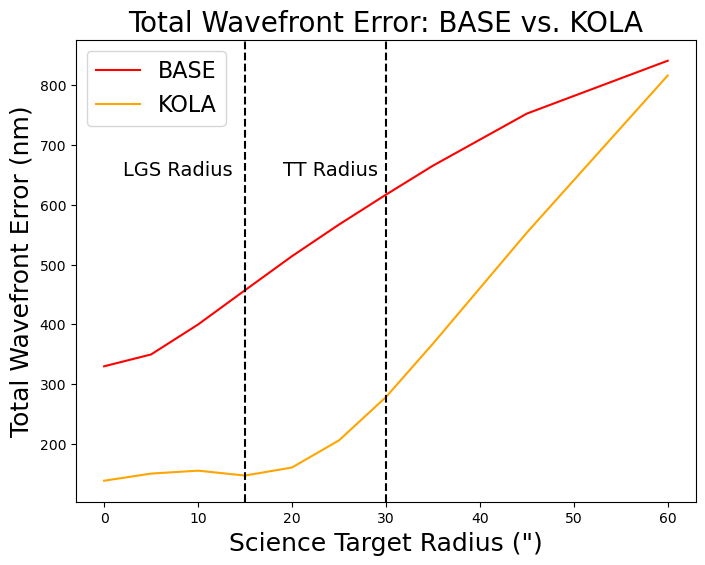

In [188]:
plt.figure(figsize=(8, 6))
plt.plot(x_base[:, 8], clos_xx_mean_nm_base[:,0], color="red", label="BASE")
plt.plot(x_kola[:, 8], clos_xx_mean_nm_kola[:,0], color="orange", label="KOLA")

plt.axvline(x = 15, color="black", linestyle = "--")
plt.text(x=2, y=650, s="LGS Radius", fontsize=14)

plt.axvline(x = 30, color="black", linestyle = "--")
plt.text(x=19, y=650, s="TT Radius", fontsize=14)

plt.title("Total Wavefront Error: BASE vs. KOLA", fontsize=20)
plt.xlabel('Science Target Radius (")', fontsize=18)
plt.ylabel("Total Wavefront Error (nm)", fontsize=18)
plt.legend(fontsize=16)
plt.show()

### FWHM 

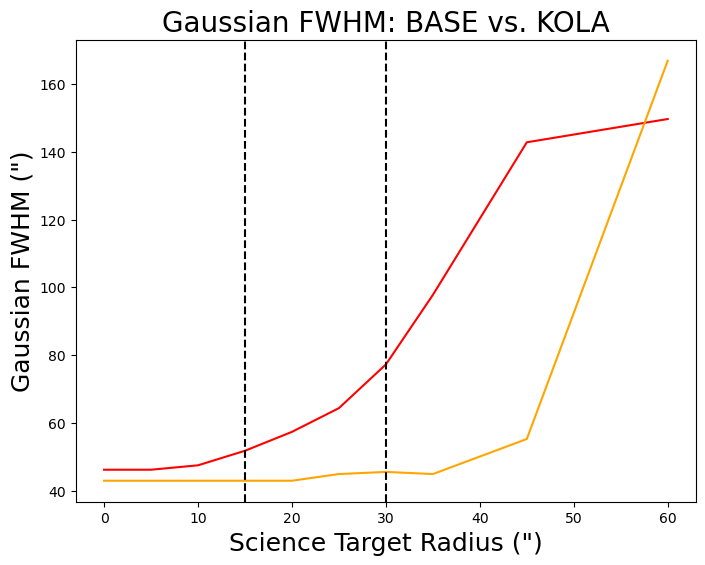

In [196]:
# Gaussian
plt.figure(figsize=(8, 6))
plt.plot(x_base[:, 8], fwhm_g_base[:, 8], color="red", label="2200 nm (BASE)")
plt.plot(x_kola[:, 8], fwhm_g_kola[:, 8], color="orange", label="2200 nm (KOLA)")

plt.axvline(x = 15, color="black", linestyle = "--")
#plt.text(x=2, y=650, s="LGS Radius", fontsize=14)

plt.axvline(x = 30, color="black", linestyle = "--")
#plt.text(x=19, y=650, s="TT Radius", fontsize=14)

plt.title("Gaussian FWHM: BASE vs. KOLA", fontsize=20)
plt.xlabel('Science Target Radius (")', fontsize=18)
plt.ylabel('Gaussian FWHM (")', fontsize=18)
#plt.legend(fontsize=16)
plt.show()

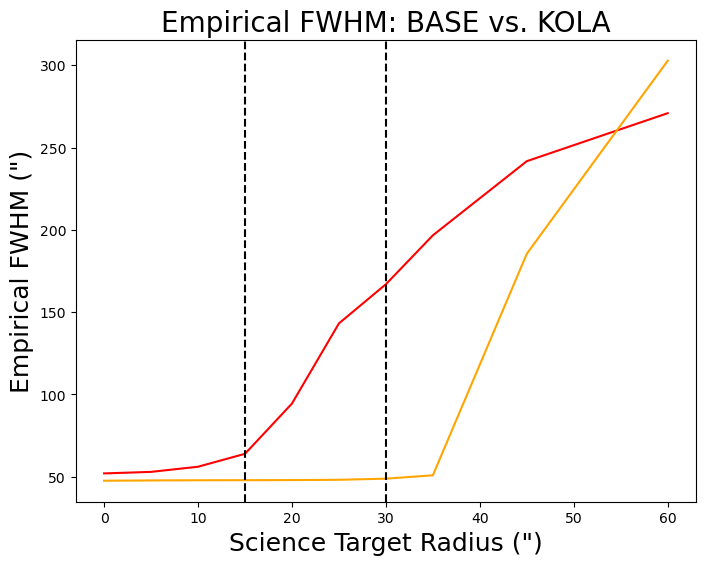

In [197]:
# Empirical
plt.figure(figsize=(8, 6))
plt.plot(x_base[:, 8], fwhm_e_base[:, 8], color="red", label="2200 nm (BASE)")
plt.plot(x_kola[:, 8], fwhm_e_kola[:, 8], color="orange", label="2200 nm (KOLA)")

plt.axvline(x = 15, color="black", linestyle = "--")
#plt.text(x=2, y=650, s="LGS Radius", fontsize=14)

plt.axvline(x = 30, color="black", linestyle = "--")
#plt.text(x=19, y=650, s="TT Radius", fontsize=14)

plt.title("Empirical FWHM: BASE vs. KOLA", fontsize=20)
plt.xlabel('Science Target Radius (")', fontsize=18)
plt.ylabel('Empirical FWHM (")', fontsize=18)
#plt.legend(fontsize=16)
plt.show()

## Encircled Energy

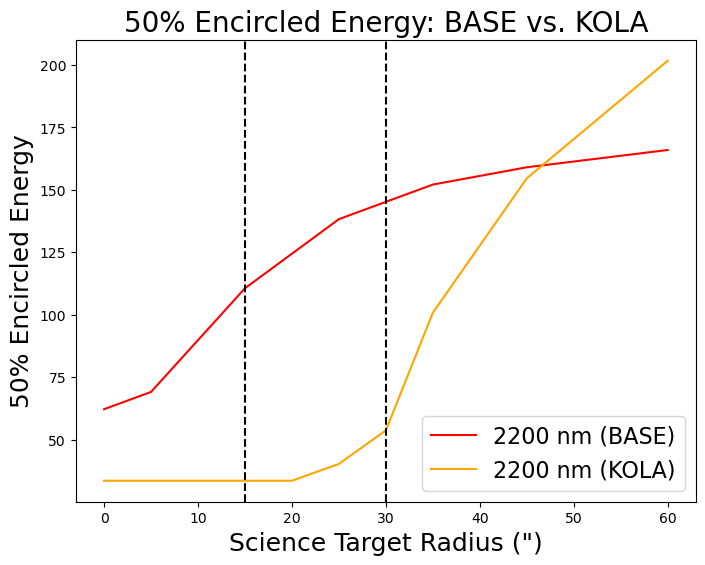

In [202]:
# 50
plt.figure(figsize=(8, 6))
plt.plot(x_base[:, 8], r_ee50_base[:, 8], color="red", label="2200 nm (BASE)")
plt.plot(x_kola[:, 8], r_ee50_kola[:, 8], color="orange", label="2200 nm (KOLA)")

plt.axvline(x = 15, color="black", linestyle = "--")
#plt.text(x=2, y=650, s="LGS Radius", fontsize=14)

plt.axvline(x = 30, color="black", linestyle = "--")
#plt.text(x=19, y=650, s="TT Radius", fontsize=14)

plt.title("50% Encircled Energy: BASE vs. KOLA", fontsize=20)
plt.xlabel('Science Target Radius (")', fontsize=18)
plt.ylabel('50% Encircled Energy', fontsize=18)
plt.legend(fontsize=16)
plt.show()

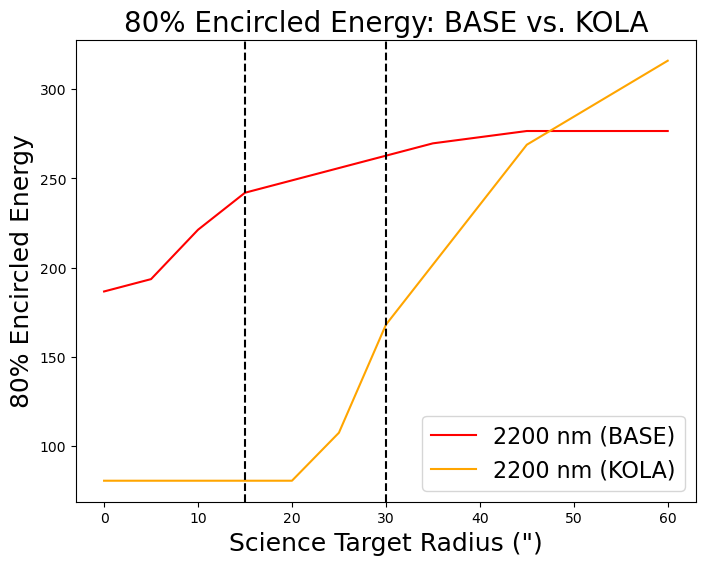

In [201]:
# 80
plt.figure(figsize=(8, 6))
plt.plot(x_base[:, 8], r_ee80_base[:, 8], color="red", label="2200 nm (BASE)")
plt.plot(x_kola[:, 8], r_ee80_kola[:, 8], color="orange", label="2200 nm (KOLA)")

plt.axvline(x = 15, color="black", linestyle = "--")
#plt.text(x=2, y=650, s="LGS Radius", fontsize=14)

plt.axvline(x = 30, color="black", linestyle = "--")
#plt.text(x=19, y=650, s="TT Radius", fontsize=14)

plt.title("80% Encircled Energy: BASE vs. KOLA", fontsize=20)
plt.xlabel('Science Target Radius (")', fontsize=18)
plt.ylabel('80% Encircled Energy', fontsize=18)
plt.legend(fontsize=16)
plt.show()